# Inferencia Estadística IV



Para abrirlo en Google colab:  <a target="_blank" href="https://githubtocolab.com/SysBioengLab/IIQ3402-Statistical-Design/blob/main/Clases/Clase8_InferenciaEstadisticaIV.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [ ]:
# Requerimientos
!pip install seaborn -q # Para visualización y datasets
!pip install scipy -q # Para analísis estadísticos
!pip install numpy -q # Para cálculos científicos
!pip install pandas -q # Para almacenamiento y trabajo con datos
!pip install matplotlib -q # Para visualización
!pip install statsmodels -q # Para analísis estadísticos
!pip install rdatasets -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.1/50.1 MB 19.4 MB/s eta 0:00:00


## Poder Estadístico

Para poder calcular el poder estadístico de una prueba, es necesario calcular el valor-p (p-value) de la prueba realizada. Para esto, los paquetes de análisis estadístico disponibles en python poseen la opción de poder calcularlo. Volviendo al ejemplo de pasado, de los datos de sueño, podemos calcular el poder estadístico de la prueba.

In [ ]:
# data set artificial
import numpy as np
np.random.seed(11)
horas_sueno = np.random.beta(3.5, 10, 100) *8 + 5

Usando una prueba estadística de media, asumiendo normalidad e independencia, también conocido como z-test, podemos evaluar el poder de la prueba al ver la media de la población.

In [ ]:
from statsmodels.stats.weightstats import ztest
promedio_nacional = 7
statistic, pvalue = ztest(horas_sueno, value = promedio_nacional,
                                   alternative = 'larger')
print(f'Estadístico de la prueba: {statistic:.3f}')
print(f'Valor-p de la prueba: {pvalue:.3f}')

Estadístico de la prueba: 1.994
Valor-p de la prueba: 0.023


Ahora, podemos rechazar la hipótesis nula $H_0$, pero el poder estadístico de dicha conclusión es necesaria poder calcularla. Para esto, es posible calcular el poder estadístico de esta prueba:

In [ ]:
from statsmodels.stats.power import zt_ind_solve_power
import scipy.stats as st

mean_sample = np.mean(horas_sueno)
mean_stat = 7
std_pop = 1

beta = zt_ind_solve_power(effect_size = (mean_stat - mean_sample)/np.sqrt(std_pop),
                           nobs1 = len(horas_sueno),
                           alpha = 0.05,
                           alternative = 'larger')

print(f'Poder estadístico: {(1-beta)*100:.2f}%')

Poder estadístico: 99.89%


De esta forma, el test tiene un gran poder estadístico.

## Distribución t

La distribución t se utiliza en el caso de no tener suficientes datos (n<30) para obtener la disviación estándar de la población. A su vez, es útil en casos de tener una distribución casi normal.

En este caso, en vez de un z-test, se realiza un t-test. Para realizarlo se realiza el mismo procedimiento anterior.

In [ ]:
from scipy.stats import ttest_1samp # el t-test de statsmodels funciona diferente
from statsmodels.stats.power import tt_ind_solve_power
promedio_nacional = 7
statistic, pvalue = ttest_1samp(horas_sueno,  promedio_nacional,
                                   alternative = 'greater')
print(f'Estadístico de la prueba: {statistic:.3f}')
print(f'Valor-p de la prueba: {pvalue:.3f}')
# y el poder estadistico

beta = tt_ind_solve_power(
    effect_size = (mean_stat - mean_sample)/np.sqrt(np.std(horas_sueno)), # delta/sigma
    nobs1 = len(horas_sueno), # tamaño de la muestra
    alpha = 0.05, # nivel de significancia
)
print(f'Poder estadístico: {(1 - beta)*100:.2f}%')


Estadístico de la prueba: 1.994
Valor-p de la prueba: 0.024
Poder estadístico: 70.91%


El poder estadístico disminuye. ¿Por qué podría estas pasando esto?

## Caso de Estudio: Efecto del ejercicio regular en el peso de los sujetos de estudio

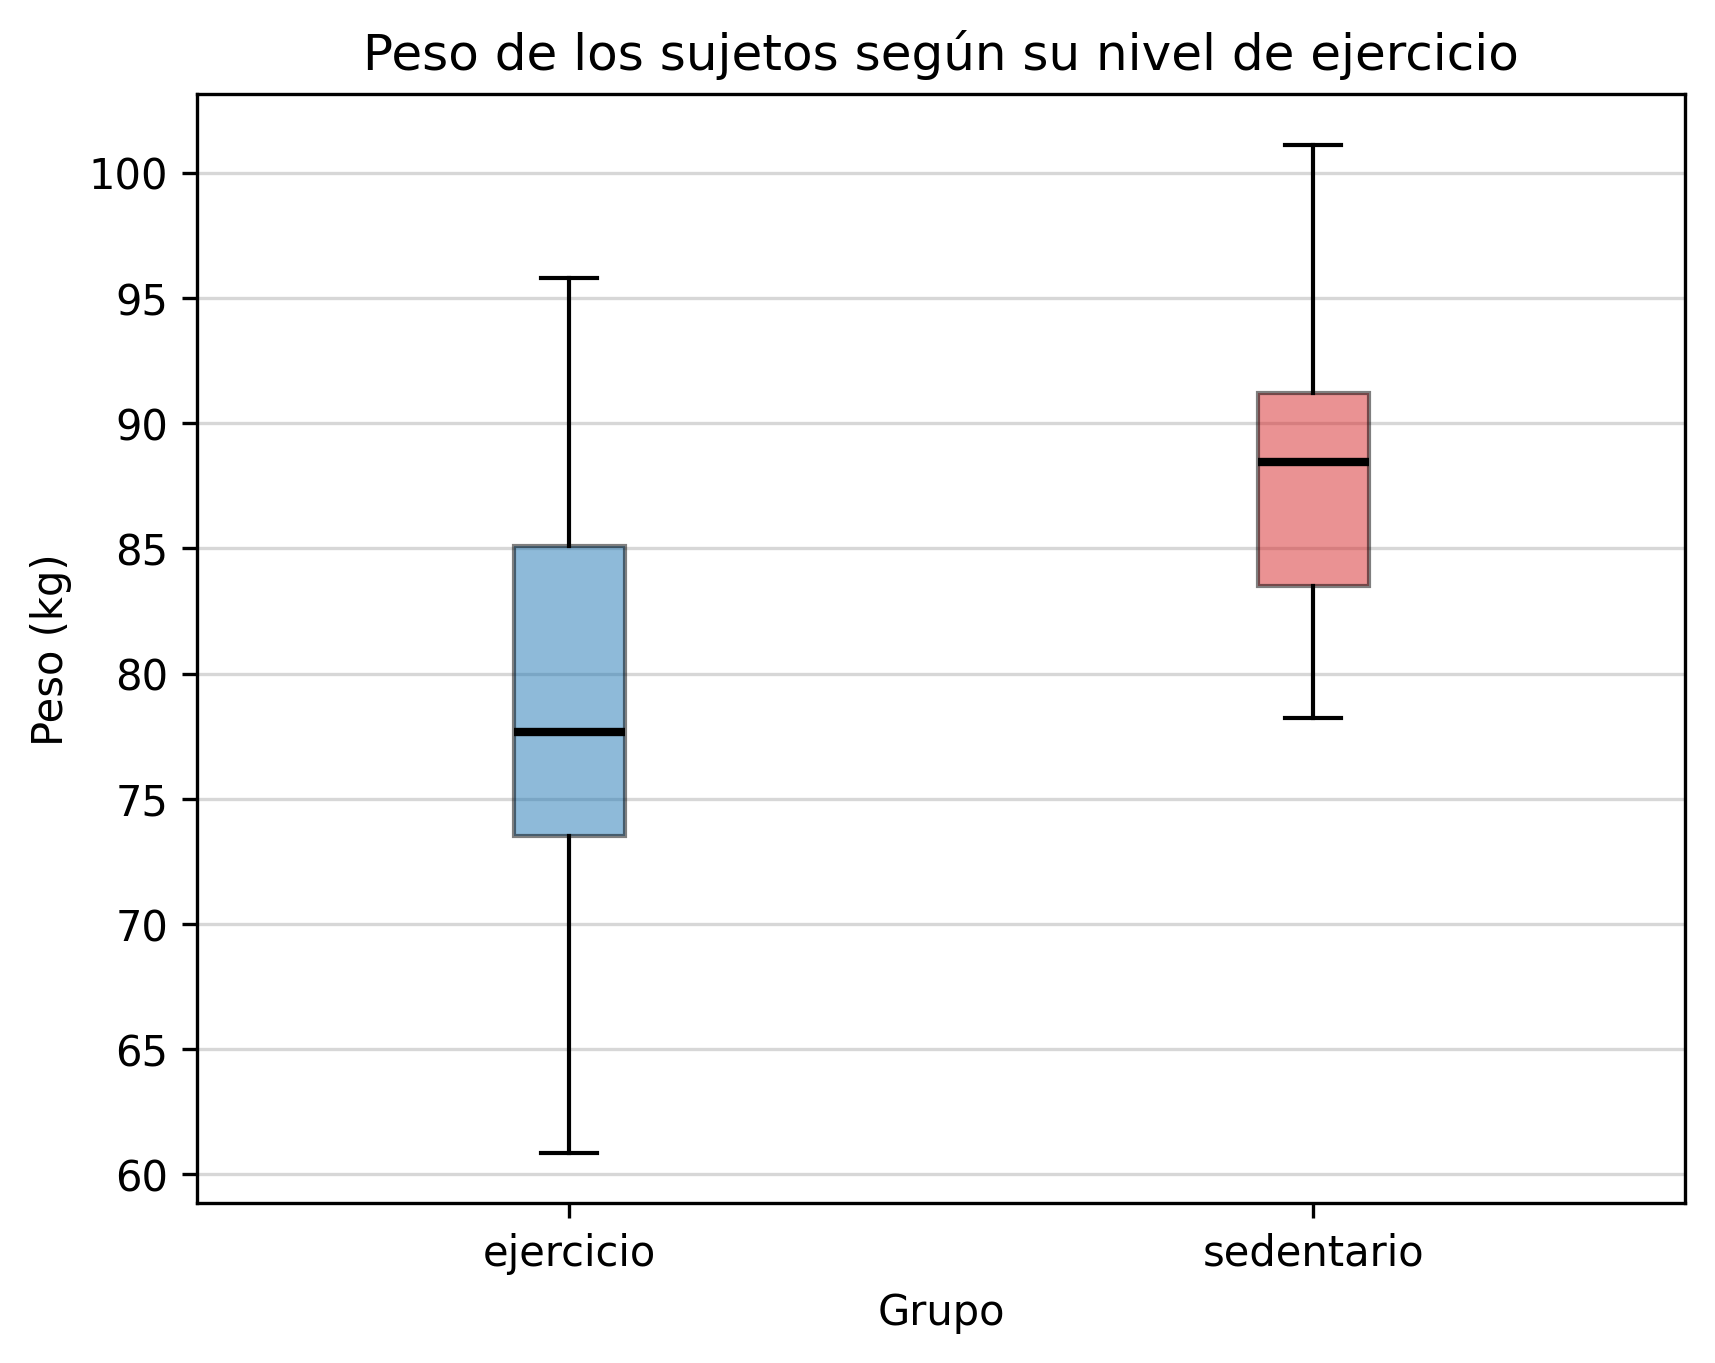

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import io
np.random.seed(42)
df_ejercicio = pd.DataFrame.from_dict({
    'ejercicio': np.random.normal(loc = 80, scale = 10, size = 20),
    'sedentario': np.random.normal(loc = 90, scale = 6, size = 20)
})
df_ejercicio.head()

## Analisis exploratorio

fig, ax = plt.subplots(dpi = 300)
color = ['tab:blue', 'tab:red']
i = 0
for posi, name in enumerate(df_ejercicio.columns):
    data = df_ejercicio[name].values
    bp = ax.boxplot(data, positions = [posi], tick_labels = [name], patch_artist=True,
                    boxprops = dict(facecolor = color[i], alpha = 0.5),
                    medianprops=dict(color = 'k', linewidth = 2))
    i+=1
ax.set_xlabel('Grupo')
ax.set_ylabel('Peso (kg)')
ax.grid(axis = 'y', alpha = 0.5)
ax.set_title('Peso de los sujetos según su nivel de ejercicio')

plt.show()



Análisis del estudio

Promedio ejercicio: 78.29; Promedio sedentadio: 88.40
Desviación estándar ejercicio: 9.36; Desviación estándar sedentadio: 5.66
Tamaño ejercicio: 20; Tamaño sedentadio: 20


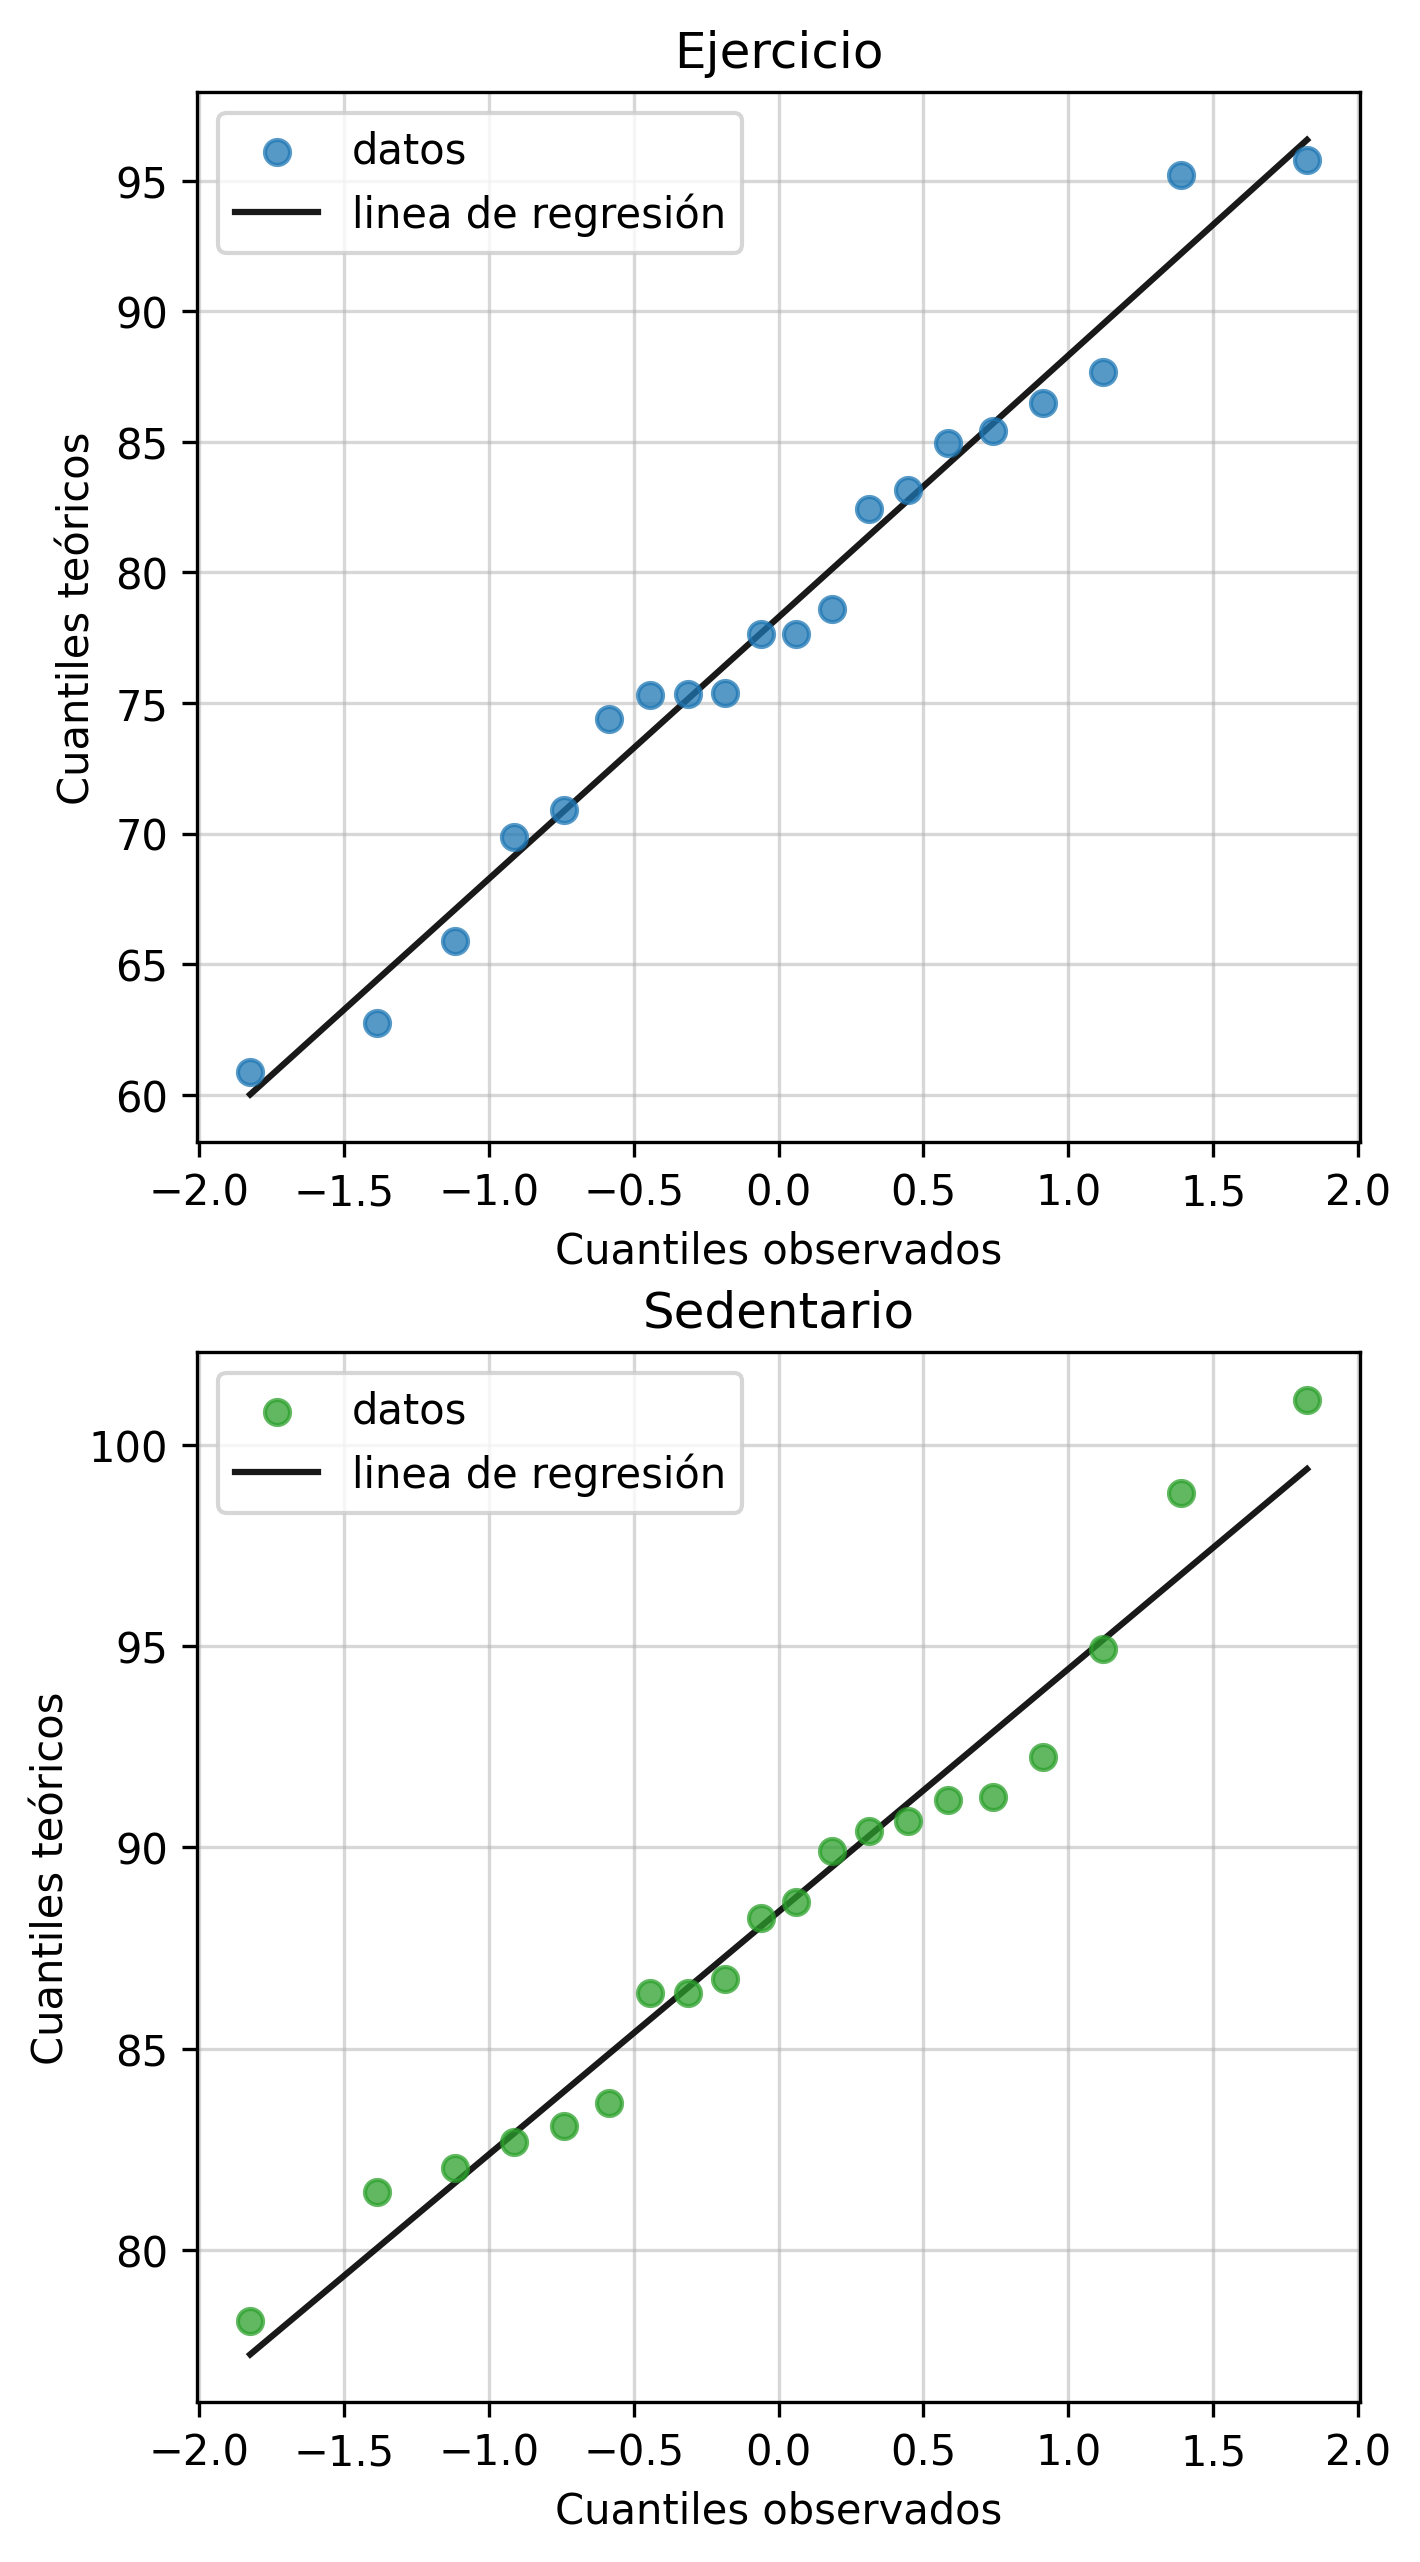

In [ ]:
# Test de hipótesis
# 1. Hipótesis
# H0: µ_ejercicio  - µ_sedentario = 0
# Ha: µ_ejercicio  - µ_sedentario ≠ 0
# 2. Calcular estimadores puntuales - promedio y erorr estándar
ejercicio = df_ejercicio['ejercicio'].values
sedentario = df_ejercicio['sedentario'].values

mean_ejercicio = np.mean(ejercicio)
mean_sedentario = np.mean(sedentario)
std_ejercicio = np.std(ejercicio)
std_sedentario = np.std(sedentario)
n_ejercicio = len(ejercicio)
n_sedentario = len(sedentario)
diferencias_esperadas = 0

print(f'Promedio ejercicio: {mean_ejercicio:.2f}; Promedio sedentadio: {mean_sedentario:.2f}')
print(f'Desviación estándar ejercicio: {std_ejercicio:.2f}; Desviación estándar sedentadio: {std_sedentario:.2f}')
print(f'Tamaño ejercicio: {n_ejercicio}; Tamaño sedentadio: {n_sedentario}')

# 3. Verificar supuestos
# Independencia: dada asignación aleatoria
# Normalidad: Revisamos los qqplots

fig, ax = plt.subplots(2, 1, figsize = (5, 10), dpi = 300)
# ejercicio
(osm, osr), (slope, intercept, r) = st.probplot(ejercicio)
ax[0].scatter(osm, osr, alpha = 0.75, color = 'tab:blue', zorder = 3, label = 'datos')
ax[0].plot(osm, osm*slope + intercept, alpha = 0.9, color = 'k', zorder = 2, label = 'linea de regresión')
ax[0].set_title('Ejercicio')
ax[0].legend()
ax[0].set_xlabel('Cuantiles observados')
ax[0].set_ylabel('Cuantiles teóricos')
ax[0].grid(alpha = 0.5)

# sedentario
(osm, osr), (slope, intercept, r) = st.probplot(sedentario)
ax[1].scatter(osm, osr, alpha = 0.75, color = 'tab:green', zorder = 3, label = 'datos')
ax[1].plot(osm, osm*slope + intercept, alpha = 0.9, color = 'k', zorder = 2, label = 'linea de regresión')
ax[1].set_title('Sedentario')
ax[1].legend()
ax[1].set_xlabel('Cuantiles observados')
ax[1].set_ylabel('Cuantiles teóricos')
ax[1].grid(alpha = 0.5)

plt.show()



In [ ]:
# 4. calculamos el estadístico correspondiente y el valor-p
gdl = n_ejercicio + n_sedentario - 2
Sp = np.sqrt(
    ( ((n_sedentario -1 )*(std_sedentario**2))+ ((n_ejercicio - 1) * std_ejercicio**2) )/gdl
)
Sp_n = Sp * np.sqrt(1/n_ejercicio + 1/n_sedentario )
# calculo valor t
valor_t = (mean_ejercicio - mean_sedentario - diferencias_esperadas)/Sp_n


print(f'Grados de Libertad: {gdl:.0f}')
print(f'Sp: {Sp:.2f}')
print(f'Sp_n: {Sp_n:.2f}')
print(f'Valor-t: {valor_t:.2f}')

# calculamos el valor p
p_val = 2 * st.t.cdf(valor_t, df = gdl) # aprovechamos la simetría de la distribución t
# p-value: 0.000252
print(f'Valor-p: {p_val:.2e}')

Grados de Libertad: 38
Sp: 7.73
Sp_n: 2.45
Valor-t: -4.14
Valor-p: 1.88e-04


In [ ]:
# 5. Calculamos los intervalos de 95% de confianza para la diferencia

x1_x2 = mean_ejercicio - mean_sedentario
t_critico = st.t.ppf(1 - 0.05/2, df = gdl) # t_alpha/2 para ambas colas
corte_inferior = x1_x2 - t_critico * Sp_n
corte_superior = x1_x2 + t_critico * Sp_n

print(f'{corte_inferior:.2f} ≤ µ_ejercicio - µ_sedentario ({mean_ejercicio - mean_sedentario:.2f}) ≤ {corte_superior:.2f}')



-15.07 ≤ µ_ejercicio - µ_sedentario (-10.12) ≤ -5.17


In [ ]:
# Para poner juntos los casos de varianza igual y varianza desigual les probeemos de la
# siguiente función
def ci_dif_mean_t(mean1, mean2, std1, std2, n1, n2, alpha = 0.05, equal_var = True):
    '''
    Intervalo de confianza para la diferencia de medias en una prueba t.
    Asumimos std1 != std2
    ---
    Parametros:
    mean1: float
        media de la muestra 1
    mean2: float
        media de la muestra 2
    std1: float
        desviacion estandar de la muestra 1
    std2: float
        desviacion estandar de la muestra 2
    n1: int
        tamaño de la muestra 1
    n2: int
        tamaño de la muestra 2
    alpha: float
        nivel de significancia
    ---

    '''
    if equal_var:
        ddof = n1 + n2 - 2
        Sp = np.sqrt(
            ( ((n1 -1 )*(std1**2))+ ((n2 - 1) * std2**2) )/ddof
        )
        Sp_n = Sp * np.sqrt(1/n1 + 1/n2 )
        t_percentile = t.ppf(1 - alpha/2, df = ddof)
        dif_mean = mean1 - mean2
        lower = dif_mean - t_percentile * Sp_n
        upper = dif_mean + t_percentile * Sp_n
    else:
        # adaptación de Welch - Satterthwaite
        nu_numerator = (((std1**2) / n1) + ((std2**2) / n2)) ** 2
        nu_denominator = (((std1**2) / n1) ** 2) / (n1 - 1) + (((std2**2) / n2) ** 2) / (n2 - 1)

        nu = (nu_numerator / nu_denominator)  # Final degrees of freedom
        Sp = np.sqrt(
            (std1**2 / n1) + (std2**2 / n2)
        )
        t_percentile = st.t.ppf(1 - alpha/2, df = nu)
        dif_mean = mean1 - mean2
        lower = dif_mean - t_percentile * Sp
        upper = dif_mean + t_percentile * Sp
    return lower, upper

mean_ejercicio = np.mean(ejercicio)
mean_sedentario = np.mean(sedentario)
std_ejercicio = np.std(ejercicio)
std_sedentario = np.std(sedentario)
n_ejercicio = len(ejercicio)
n_sedentario = len(sedentario)
alpha = 0.05
dif_t = ci_dif_mean_t(
    mean1 = mean_ejercicio,
    mean2 = mean_sedentario,
    std1 = std_ejercicio,
    std2 = std_sedentario,
    n1 = n_ejercicio,
    n2 = n_sedentario,
    alpha = alpha,
    equal_var = False
)
print(f'Intervalo de confianza para la diferencia de medias: ({dif_t[0]:.2f}, {dif_t[1]:.2f})')
print(f'Con un nivel de confianza del {100*(1-alpha):.0f}%')
print(f'{dif_t[0]:.2f} ≤ µ_ejercicio - µ_sedentario ({mean_ejercicio - mean_sedentario:.2f}) ≤ {dif_t[1]:.2f}')
#


Intervalo de confianza para la diferencia de medias: (-15.10, -5.13)
Con un nivel de confianza del 95%
-15.10 ≤ µ_ejercicio - µ_sedentario (-10.12) ≤ -5.13


In [ ]:
# Evaluamos el test-t con varianzas iguales y no iguales por medio de la adaptacion de Welch
# varianza igual
from scipy.stats import ttest_ind
tt_eq = ttest_ind(ejercicio, sedentario, equal_var = True)
tt_noneq = ttest_ind(ejercicio, sedentario, equal_var = False)

print('--------Prueba t de varianzas semejantes--------')
print('tt_eq = ttest_ind(ejercicio, sedentario, equal_var = True)')
print(f'Estadístico de la prueba: {tt_eq.statistic:.2f}')
print(f'Grados de libertad: {tt_eq.df:.2f}')
print(f'Valor-p de la prueba: {tt_eq.pvalue:.2e}')
print('\n')
print('--------Prueba t de Welch de varianzas desiguales--------')
print('tt_noneq = ttest_ind(ejercicio, sedentario, equal_var = False)')
print(f'Estadístico de la prueba: {tt_noneq.statistic:.2f}')
print(f'Grados de libertad: {tt_noneq.df:.2f}')
print(f'Valor-p de la prueba: {tt_noneq.pvalue:.2e}')

--------Prueba t de varianzas semejantes--------
tt_eq = ttest_ind(ejercicio, sedentario, equal_var = True)
Estadístico de la prueba: -4.03
Grados de libertad: 38.00
Valor-p de la prueba: 2.57e-04


--------Prueba t de Welch de varianzas desiguales--------
tt_noneq = ttest_ind(ejercicio, sedentario, equal_var = False)
Estadístico de la prueba: -4.03
Grados de libertad: 31.27
Valor-p de la prueba: 3.30e-04


## Tests no paramétricos

Cuando no se cumple la condición de normalidad es posbiel utilizar la prueba de Mann-Whitney U, pero esta tiene menor poder

In [ ]:
from scipy.stats import mannwhitneyu
mwu_peso = mannwhitneyu(ejercicio, sedentario, method = 'exact')
print(f'Estadistico: {mwu_peso.statistic:.2f}')
print(f'Valor-p: {mwu_peso.pvalue:.2e}')

Estadistico: 74.00
Valor-p: 4.19e-04


En el caso de que no exista independencia entre los grupos, es posible realizar los denominados *test pareados*. Estos permiten realizar las pruebas estadísticas necesarias tomando en cuenta dependencia entre los datos.
Para pruebas paramétricas se tiene:
- Test t pareado: [ttest_rel](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_rel.html#scipy.stats.ttest_rel)
Para pruebas no-paramétricas:
- Test Wilcoxon-Signed Rank: [wilcoxon](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.wilcoxon.html#scipy.stats.wilcoxon)

In [ ]:
# estos codigos se llamarían de la siguiente forma
rng = 42
a = st.norm.rvs(loc=5, scale=10, size=500, random_state=rng)
b = (st.norm.rvs(loc=5, scale=10, size=500, random_state=rng)
    + st.norm.rvs(scale=0.5, size=500, random_state=rng))

# ttest pareado (paramétrico)
tt_rel = st.ttest_rel(a,b)

# wilcoxon (no paramétrico)
wil_test = st.wilcoxon(a,b) # asume por defecto relación

print('ttest pareado')
print(f'Estadístico de la prueba: {tt_rel.statistic:.2f}')
print(f'Valor-p de la prueba: {tt_rel.pvalue:.2e}')
print('\n')
print('Wilcoxon')
print(f'Estadístico de la prueba: {wil_test.statistic:.2f}')
print(f'Valor-p de la prueba: {wil_test.pvalue:.2e}')

ttest pareado
Estadístico de la prueba: -0.16
Valor-p de la prueba: 8.76e-01


Wilcoxon
Estadístico de la prueba: 62285.00
Valor-p de la prueba: 9.16e-01
